# Analyzing Portfolio Risk and Return

In this analysis I am going to evaluate four new investment options for inclusion in the client portfolios. I will need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.


### Importing the Data

#### Importing the required libraries and dependencies.

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline


#### Using the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. 

In [9]:
whale_navs_csv=pd.read_csv(Path("~/Desktop/FinTech-Workspace/Week_4/risk_return_analysis/Resources/whale_navs.csv"), index_col="date", parse_dates=True, infer_datetime_format=True)
whale_navs_csv.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Using the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. This DataFrame is based on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. 

In [10]:
whale_navs_daily_returns=whale_navs_csv.pct_change().dropna()
whale_navs_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. I’ll analyze each component one at a time.

###  Analyzing the Performance

Analyzing the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Using the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. 

<AxesSubplot:title={'center':'Soros - Daily Returns, Q4 2014 - Q3 2020'}, xlabel='date'>

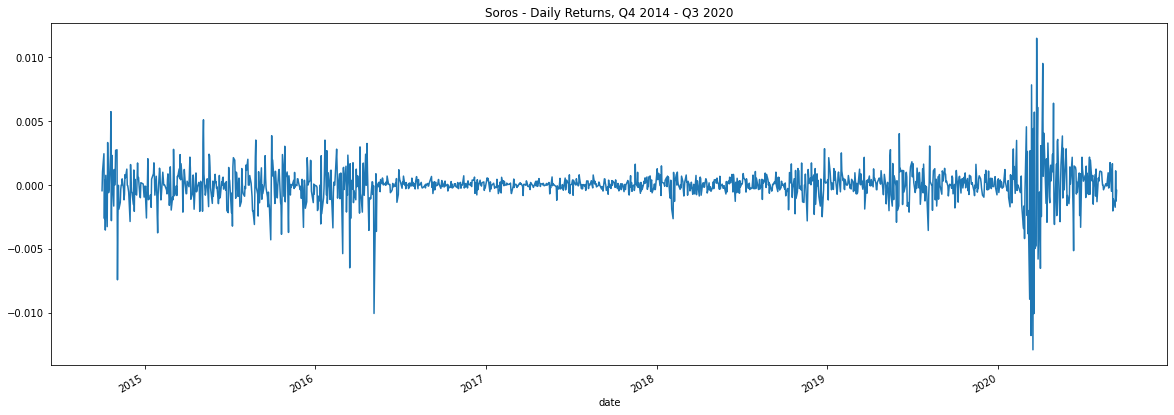

In [11]:
# Soros - daily return plot
whale_navs_daily_returns.loc[:,"SOROS FUND MANAGEMENT LLC"].plot(figsize=(20,7), title="Soros - Daily Returns, Q4 2014 - Q3 2020")

<AxesSubplot:title={'center':'Paulson - Daily Returns, Q4 2014 - Q3 2020'}, xlabel='date'>

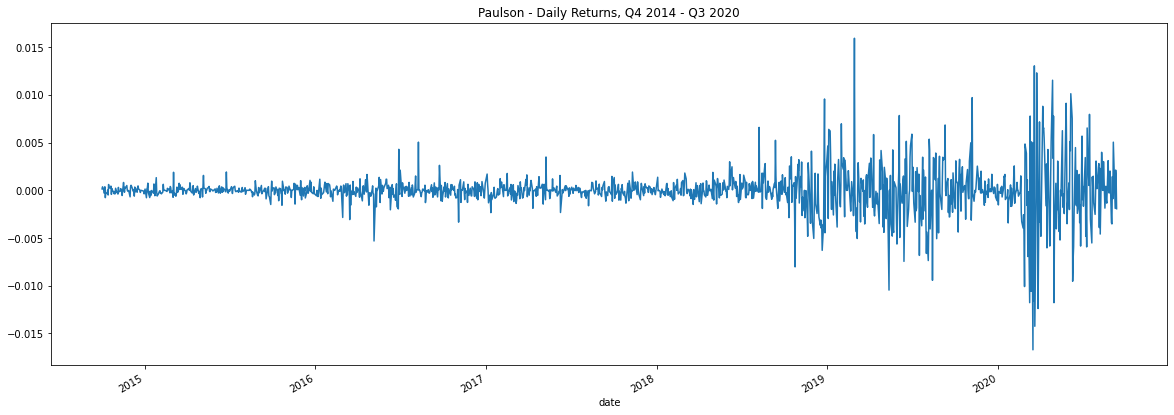

In [12]:
# Paulson - daily return plot
whale_navs_daily_returns.loc[:,"PAULSON & CO.INC."].plot(figsize=(20,7), title="Paulson - Daily Returns, Q4 2014 - Q3 2020")

<AxesSubplot:title={'center':'Tiger - Daily Returns, Q4 2014 - Q3 2020'}, xlabel='date'>

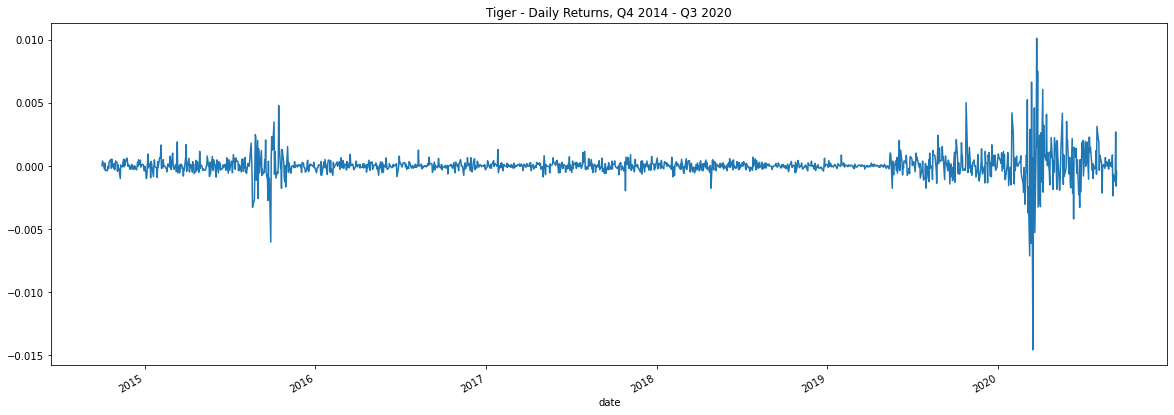

In [13]:
# Tiger - daily return plot
whale_navs_daily_returns.loc[:,"TIGER GLOBAL MANAGEMENT LLC"].plot(figsize=(20,7), title="Tiger - Daily Returns, Q4 2014 - Q3 2020")

<AxesSubplot:title={'center':'Berkshire - Daily Returns, Q4 2014 - Q3 2020'}, xlabel='date'>

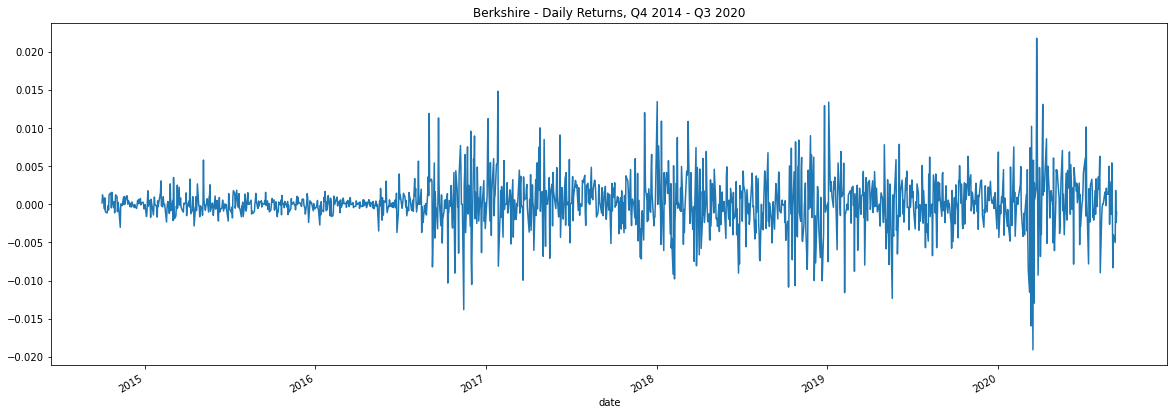

In [14]:
# Berkshire - daily return plot
whale_navs_daily_returns.loc[:,"BERKSHIRE HATHAWAY INC"].plot(figsize=(20,7), title="Berkshire - Daily Returns, Q4 2014 - Q3 2020")

<AxesSubplot:title={'center':'S&P 500 - Daily Returns, Q4 2014 - Q3 2020'}, xlabel='date'>

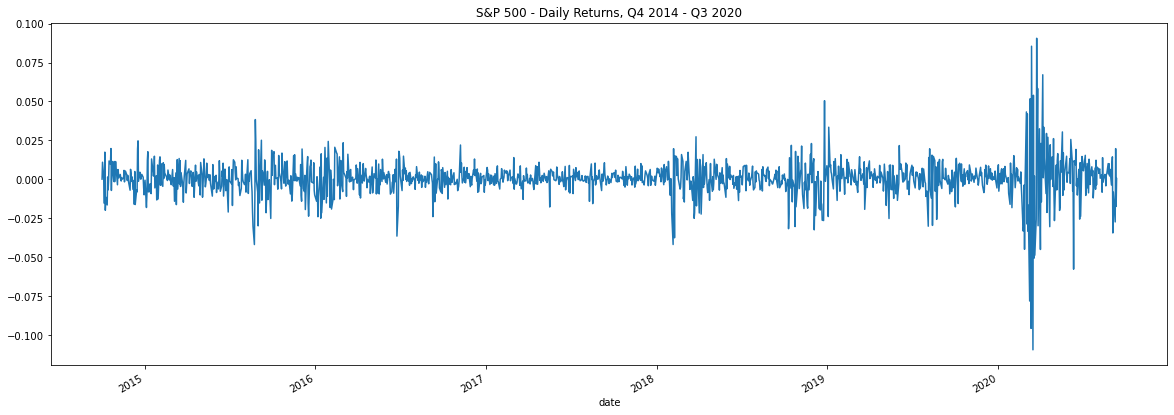

In [48]:
# S&P 500 - daily return plot
whale_navs_daily_returns.loc[:,"S&P 500"].plot(figsize=(20,7), title="S&P 500 - Daily Returns, Q4 2014 - Q3 2020")

<AxesSubplot:title={'center':'Whale NAVs and S&P 500 - Daily Returns, Q4 2014 - Q3 2020'}, xlabel='date'>

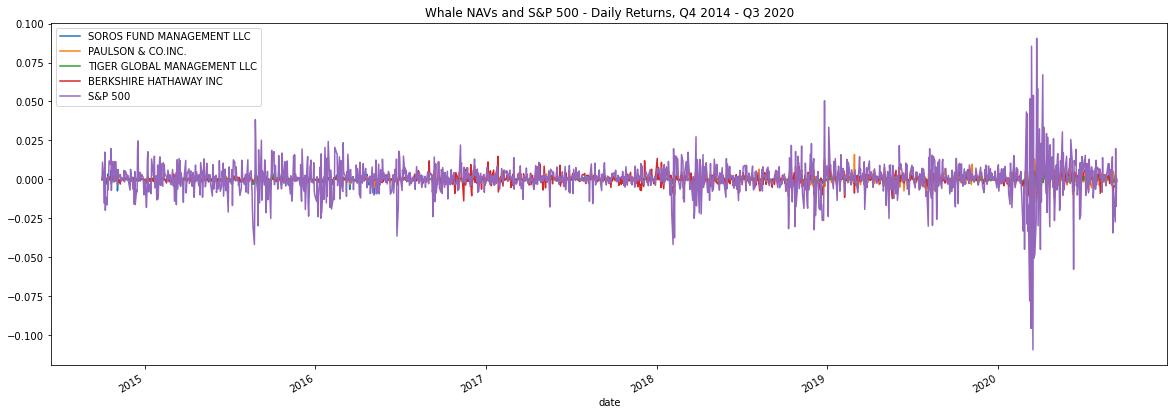

In [15]:
# Daily return data of the 4 funds and the S&P 500 
whale_navs_daily_returns.plot(figsize=(20,7), title="Whale NAVs and S&P 500 - Daily Returns, Q4 2014 - Q3 2020")

#### Using the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Reviewing the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [16]:
cumulative_returns=(1+whale_navs_daily_returns).cumprod()
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Using the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time.

<AxesSubplot:title={'center':'Whale NAVs and S&P 500 - Cumulative Returns, Q4 2014 - Q3 2020'}, xlabel='date'>

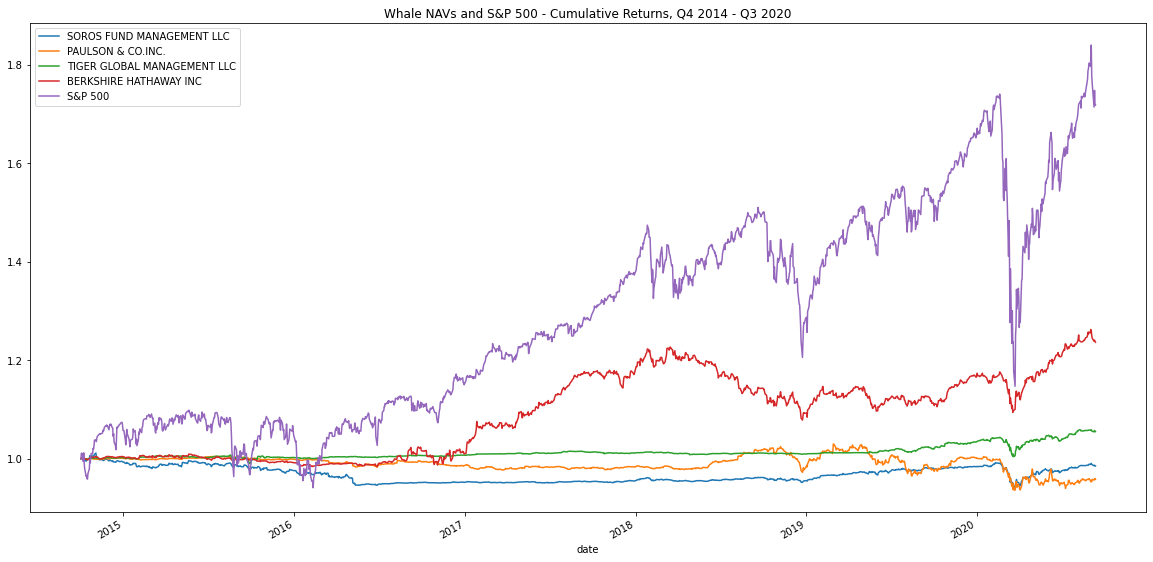

In [17]:
cumulative_returns.plot(figsize=(20,10), title="Whale NAVs and S&P 500 - Cumulative Returns, Q4 2014 - Q3 2020")


**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** S&P 500 was outperformed couple of times early in the given time period, specificaly in Q4 2014, Q3 and Q4 2015, and Q1 2016. We can also observe that the index goes down almost every year in January, especialy 2018, 2019, and 2020 but the index was not outperformed in any of these three years.

---

### Analyzing the Volatility


#### Using the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. 

<AxesSubplot:title={'center':'Whale NAVs and S&P 500 - Daily Returns, Q4 2014 - Q3 2020'}>

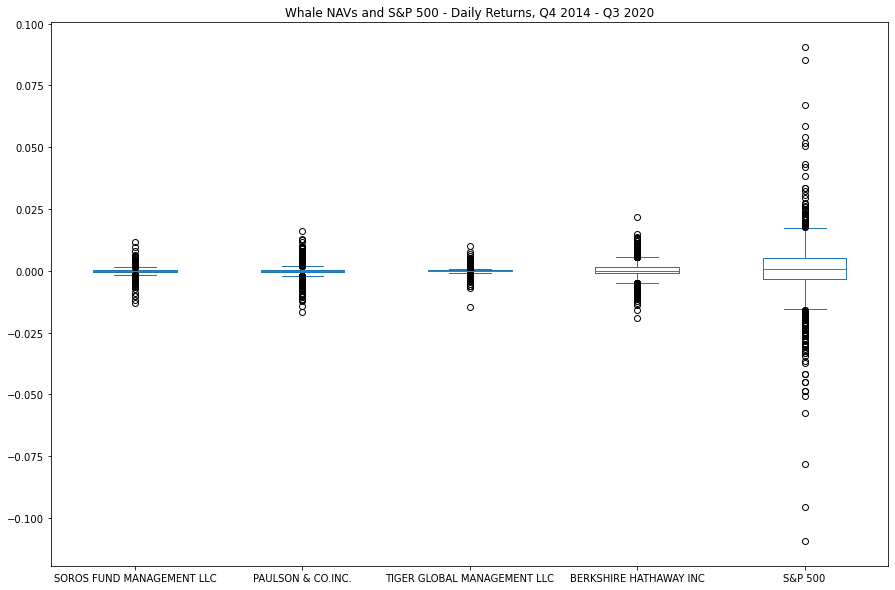

In [18]:

whale_navs_daily_returns.plot.box(figsize=(15,10), title="Whale NAVs and S&P 500 - Daily Returns, Q4 2014 - Q3 2020")


#### Using the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualizing the daily return data for just the four fund portfolios by using another box plot.

<AxesSubplot:title={'center':'Whale NAVs - Daily Returns, Q4 2014 - Q3 2020'}>

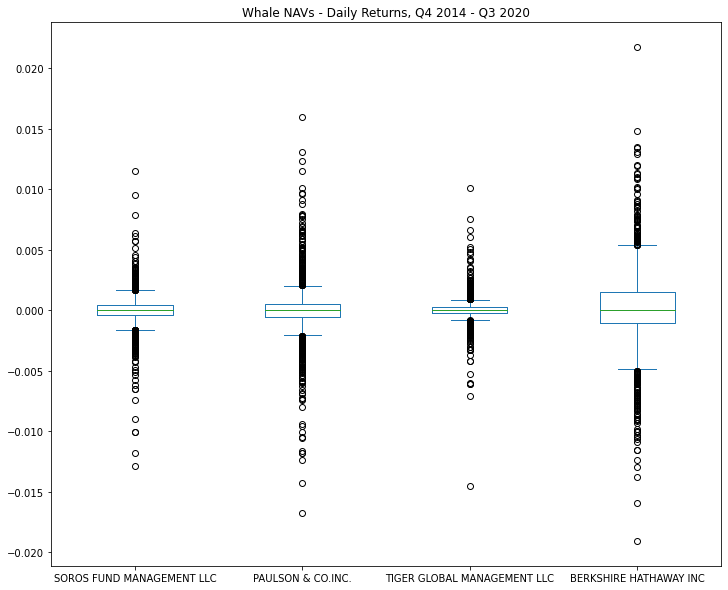

In [19]:
funds_daily_returns_df=whale_navs_daily_returns.drop(columns=['S&P 500'])
funds_daily_returns_df.plot.box(figsize=(12,10), title="Whale NAVs - Daily Returns, Q4 2014 - Q3 2020")

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** The most volatile fund is Berkshire Hathaway Inc. and the least volatile fund is Tiger Global Management LLC. This can be validated by standard deviation summary statistics. In there we can see that standard deviation of Berkshire Hathaway Inc. is the largest at 0.003256 while the standard deviation of Tiger Global Management LLC. is the smallest at 0.000996.

In [28]:
whale_navs_daily_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,-0.000009,-0.000026,0.000036,0.000147,0.000429
std,0.001405,0.002199,0.000996,0.003256,0.011550
min,-0.012910,-0.016720,-0.014563,-0.019076,-0.109424
25%,-0.000381,-0.000534,-0.000193,-0.001082,-0.003197
50%,0.000004,-0.000012,0.000007,0.000027,0.000549
75%,0.000440,0.000498,0.000240,0.001515,0.005160
max,0.011505,0.015944,0.010128,0.021761,0.090603


---

### Analyzing the Risk

Evaluating the risk profile of each portfolio by using the standard deviation and the beta.

#### Using the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [32]:
standard_deviation_whales=whale_navs_daily_returns.std()
standard_deviation_whales_sorted=standard_deviation_whales.sort_values()
standard_deviation_whales_sorted

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Calculating the annualized standard deviation for each of the four portfolios and for the S&P 500. 

In [33]:
annualized_standard_deviation_whales=standard_deviation_whales*np.sqrt(252)
annualized_standard_deviation_whales.sort_values()
annualized_standard_deviation_whales

SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
TIGER GLOBAL MANAGEMENT LLC    0.015804
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Using the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. 

<AxesSubplot:title={'center':'Rolling Standard Deviation - Whale NAVs and S&P 500'}, xlabel='date'>

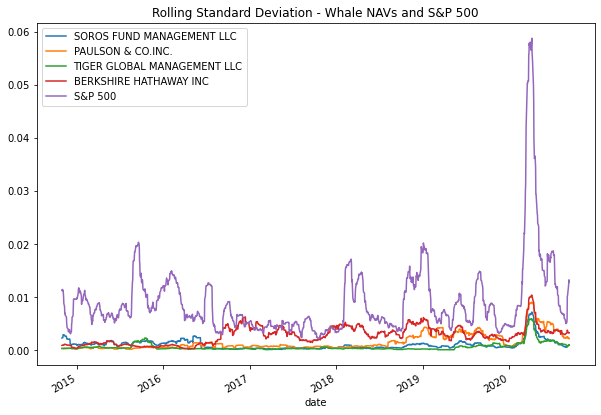

In [35]:
rolling_standard_deviation = whale_navs_daily_returns.rolling(window=21).std()

rolling_standard_deviation.plot(figsize=(10,7), title = "Rolling Standard Deviation - Whale NAVs and S&P 500")

#### Using the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios.

<AxesSubplot:title={'center':'Rolling Standard Deviation - Whale NAVs'}, xlabel='date'>

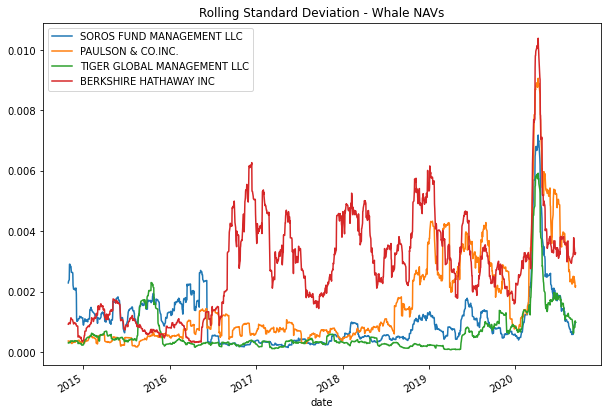

In [36]:
rolling_standard_deviation_whales = funds_daily_returns_df.rolling(window=21).std()

rolling_standard_deviation_whales.plot(figsize=(10,7), title = "Rolling Standard Deviation - Whale NAVs")

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** No portfolio poses more risk than the S&P 500. Although standard deviation of Berkshire Hathaway Inc. was higher than S&P 500 for a short time in early 2017 and early 2018

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** The risk of Soros Fund Mangement LLC increased while the risk of S&P 500 decreased in the middle of 2016. The risk of Berkshire Hathaway Inc. went different direction than the risk of S&P 500 in the end of 2016 and most of 2017 but by the end of 2018 all portfolois started to move in the same direction as S&P 500.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** In 2015 and first half of 2016 the most risky was Soros Fund Management LLC but since the second half of 2016, the most risk poses Berkshire Hathaway Inc. Since 2019 Paulson & Co Inc. appears to be comparably risky. The lowest risk poses Tiger Global Management LLC with one exception in 2015 when it's standard deviation was the highest of all for a short period of time.

##### ---

### Analyzing the Risk-Return Profile


#### Using the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. 

In [37]:
average_annual_return_whales=whale_navs_daily_returns.mean()*252
average_annual_return_whales.sort_values()
average_annual_return_whales

SOROS FUND MANAGEMENT LLC     -0.002281
PAULSON & CO.INC.             -0.006633
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

Calculating the Sharpe ratios for the four fund portfolios and for the S&P 500. 

In [38]:
sharpe_ratios=average_annual_return_whales/annualized_standard_deviation_whales
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

Visualizing the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

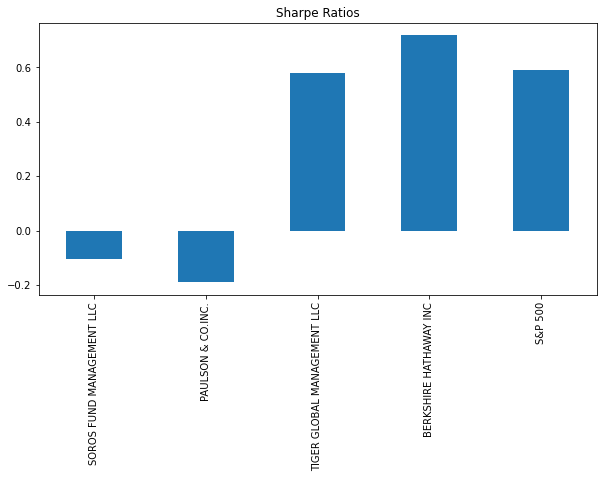

In [39]:
sharpe_ratios.plot.bar(figsize=(10,5), title="Sharpe Ratios")


**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** The best risk-return profile offers Berkshire Hathaway Inc., with a Sharpe ration of 0.717512. The worst risk-return profile has Paulson & Co.Inc. with a Sharpe ration of -0.189998 and the negative value indicates that we can expect a negative return for the assumed risk.

---

### Diversifying the Portfolio


#### Using the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualizing the last five rows of the variance of the S&P 500.

In [40]:

sp500_rolling_variance=whale_navs_daily_returns["S&P 500"].rolling(window=60).var()

sp500_rolling_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### Choosing two portfolios and for each of them completing the following steps:


##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculating the covariance. Reviewing the last five rows of the covariance of the portfolio.

In [41]:

tiger_rolling_covariance=whale_navs_daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(whale_navs_daily_returns["S&P 500"])

tiger_rolling_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 1 - Step 2: Calculating the beta of the portfolio.

In [42]:

tiger_beta = tiger_rolling_covariance/sp500_rolling_variance

tiger_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 1 - Step 3: Using the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [43]:

tiger_beta.mean()


0.03093001492279891

##### Portfolio 1 - Step 4: Plotting the 60-day rolling beta. 

<AxesSubplot:title={'center':'Tiger Global Management LLC - 60-day Rolling Beta'}, xlabel='date'>

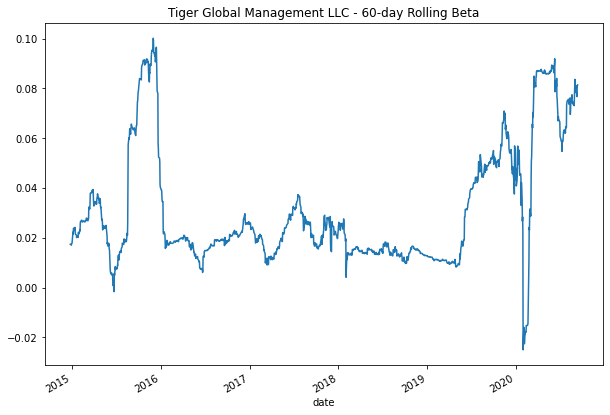

In [44]:

tiger_beta.plot(figsize=(10,7), title="Tiger Global Management LLC - 60-day Rolling Beta")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculating the covariance. Reviewing the last five rows of the covariance of the portfolio.

In [45]:

berkshire_rolling_covariance=whale_navs_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whale_navs_daily_returns["S&P 500"])

berkshire_rolling_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 2 - Step 2: Calculating the beta of the portfolio. 

In [46]:
berkshire_beta = berkshire_rolling_covariance/sp500_rolling_variance
berkshire_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 2 - Step 3: Using the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [47]:
berkshire_beta.mean()

0.22149861061916723

##### Portfolio 2 - Step 4: Plotting the 60-day rolling beta. 

<AxesSubplot:title={'center':'Berkshire Hathaway Inc. - 60-day Rolling Beta'}, xlabel='date'>

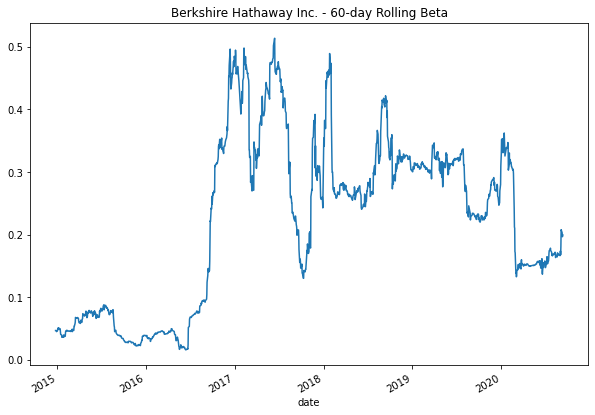

In [115]:

berkshire_beta.plot(figsize=(10,7), title="Berkshire Hathaway Inc. - 60-day Rolling Beta")


**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** They both move in the same direction as the market but Berkshire Hathaway Inc. has higher Beta so it's volatility is closer to the volatility of S&P 500.  


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Despite the high volatility, **Berkshire Hathaway Inc.** has the highest Sharpe ratio and Beta closer to 1.

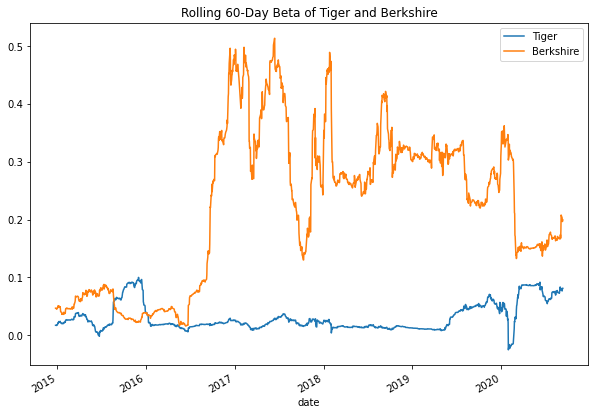

In [117]:
# plot that visualizes the 60-day rolling beta for Tiger and Berkshire together

ax = tiger_beta.plot(figsize=(10, 7), title='Rolling 60-Day Beta of Tiger and Berkshire')

berkshire_beta.plot(ax=ax)

ax.legend(["Tiger", "Berkshire","S&P 500"])

---